In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from  sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics

Getting the Fake e-Commerce data  for analyses and modelling

In [7]:
customersdf=pd.read_csv('Ecommerce Customers.csv')
customersdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
Email                   500 non-null object
Address                 500 non-null object
Avatar                  500 non-null object
Avg. Session Length     500 non-null float64
Time on App             500 non-null float64
Time on Website         500 non-null float64
Length of Membership    500 non-null float64
Yearly Amount Spent     500 non-null float64
dtypes: float64(5), object(3)
memory usage: 31.4+ KB


Checking the statistics of data

In [8]:
customersdf.describe()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,33.053194,12.052488,37.060445,3.533462,499.314038
std,0.992563,0.994216,1.010489,0.999278,79.314782
min,29.532429,8.508152,33.913847,0.269901,256.670582
25%,32.341822,11.388153,36.349257,2.930450,445.038277
50%,33.082008,11.983231,37.069367,3.533975,498.887875
75%,33.711985,12.753850,37.716432,4.126502,549.313828
max,36.139662,15.126994,40.005182,6.922689,765.518462


**Doing some Exploratory data analyses(EDA) on the fake dataset**

time spent on website v/s Yearly spend

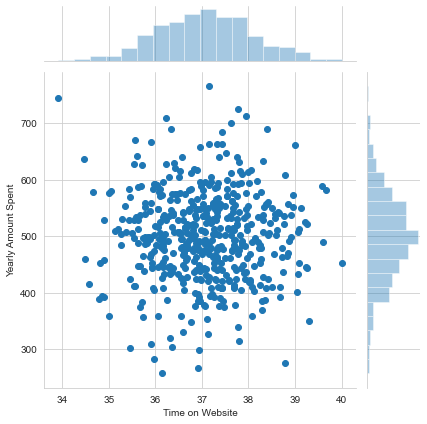

In [11]:
sns.set_style('whitegrid')
sns.jointplot('Time on Website','Yearly Amount Spent',data=customersdf,kind='scatter')

time spent on app v/s Yearly spend

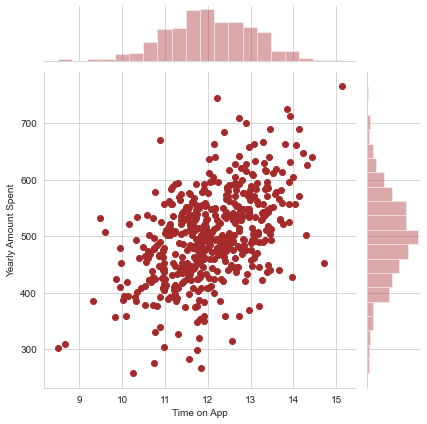

In [13]:
sns.jointplot('Time on App','Yearly Amount Spent',data=customersdf,kind='scatter',color='brown')

time spent on app v/s Length of membership

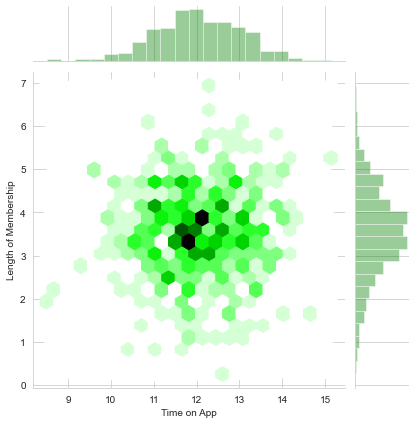

In [19]:
sns.jointplot('Time on App','Length of Membership',data=customersdf,kind='hex',color='green',annot_kws='pearsonr')

Analysing using pairplot

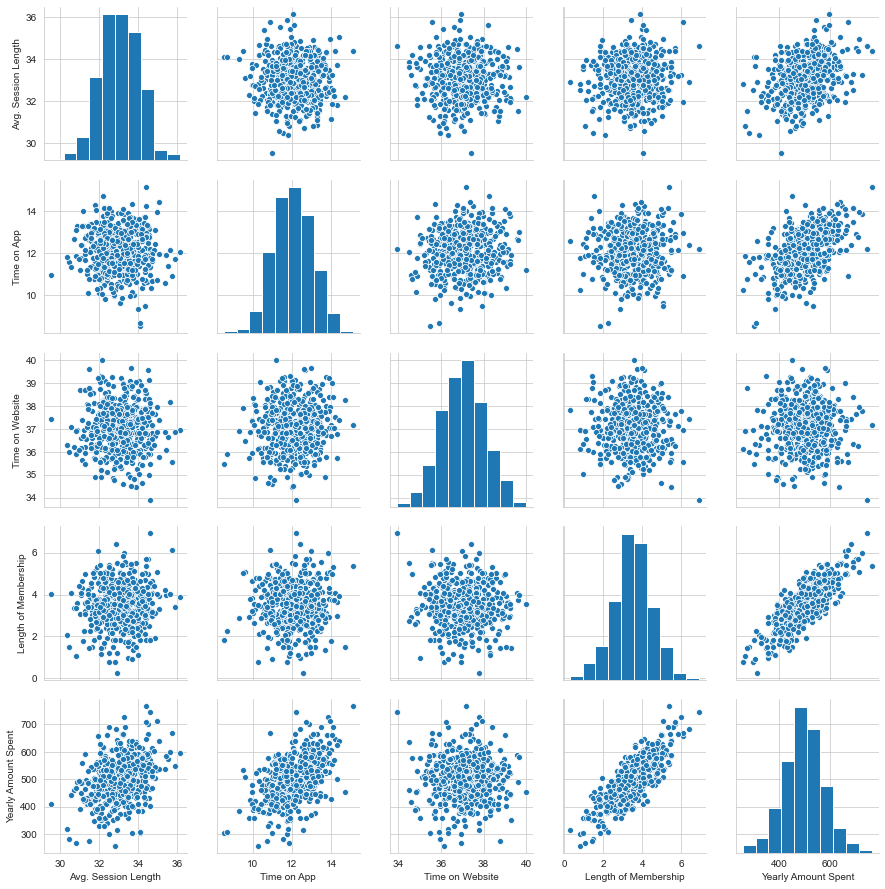

In [20]:
sns.pairplot(customersdf)

**Observations:** time spent on webisite/app  doesnot really lienarly corelate with total yearly spend. However the time spent on app has better correlation compared to website.
    Whereas the length of memeberships has very direct corerlation with Yearly spend

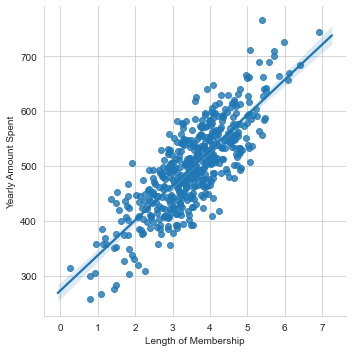

In [21]:
sns.lmplot('Length of Membership','Yearly Amount Spent',data=customersdf)

Building a linear model after splitting data to train and test

In [31]:
features=customersdf[['Avg. Session Length', 'Time on App',
       'Time on Website', 'Length of Membership']]

label=customersdf['Yearly Amount Spent']

features_train,features_test,label_train,label_test=train_test_split(features,label,test_size=0.3,random_state=111)

In [32]:
lm=LinearRegression()

In [33]:
lm.fit(X=features_train,y=label_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [47]:
label_predicted=lm.predict(X=features_test)
label_predictedS=pd.Series(label_predicted,name='Yearly spend-Predicted ')

evaluating the lm

In [34]:
lm.intercept_

-1051.9483214146567

In [36]:
coeffs=pd.DataFrame(data=lm.coef_,index=features.columns,columns=['Coefficeints']
                   )
coeffs

,Coefficeints
Avg. Session Length,25.701000
Time on App,38.628159
Time on Website,0.543057
Length of Membership,61.249247


LM Performance analyses

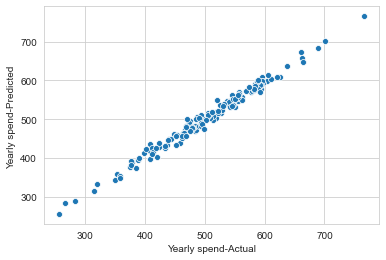

In [64]:
label_testn=label_test.rename('Yearly spend-Actual')
label_testnn=label_testn.reset_index(drop=True)
label_predictedS.reset_index(drop=True)
sns.scatterplot(label_testnn,label_predictedS)

In [65]:
metrics.mean_absolute_error(label_testnn,label_predictedS)

8.294685269008946

In [66]:
metrics.mean_squared_error(label_testnn,label_predictedS)

107.41035942115603

In [68]:
RMSE=np.sqrt(metrics.mean_squared_error(label_testnn,label_predictedS))
RMSE

10.363896922545884

In [73]:
customersdf['Yearly Amount Spent'].mean()

499.3140382585909

**Conclusion:
    The company really  needs to focus on promoting their website more as it is one of the least metric that is boost the yearly spend of customers
    Greater the time of membership , greater yearly spend**
    **The app and sessions also have been relatively successfull**
    